<h1><u>Visualization - Coffee Shop Capstone Project</u>

[Rubric](https://docs.google.com/document/d/1IRiW88JeZkV3OBaMSFcQOmYWB5jSp7XYVTuU9sc4MDw/edit)  
  

[Readme project summary example](https://github.com/Colley-K/rock_climbing_recommendation_system/blob/master/README.md)

[GitHub Markdown file guide](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)

In previous notebooks I have already defined my problem, cleaned the data set, created dummy variables for categorical data, standardized the originally numeric data, and created the train/test split. I ran the following regression modelson the data set: Linear Regression, Random Forest Regressor, Gradient Boosting (xgboost) Regressor, Support Vector Regression (SVR), and Elastic Net. All models were run with and without GridSearchCV to optimize the hyperparameters. Extreme Gradient Boosting resulted in the best model determined by returning the lowest MSE and RMSE, and second lowest MAE. The data set is from Kaggle and can be found [here](https://www.kaggle.com/datasets/patkle/coffeereviewcom-over-7000-ratings-and-reviews). The previously completed data Modeling notebook can be found [here](https://github.com/lindseyc735/Springboard/blob/main/Capstone%202/Capstone_2_Modeling_With_GridSearchCV.ipynb). Please see the below review of the project prior to considering the modeling.

<u>**Problem Statement:**</u>
<br>What features most affect the coffee rating?

<u>**Context:**</u>
<br>A start-up coffee company is creating their signature blend to sell alongside the more generic blends of coffee. The start-up needs to know what three features to primarily incorporate into their signature blend to maximize its popularity and distinguish their company from other coffee companies.

<u>**Criteria for Success:**</u>
<br>Determine the three coffee features that will create a popular, signature blend of coffee.

<u>**Scope of Solution Space:**</u>
<br>Rating
<br>Acidity
<br>Aftertaste
<br>Aroma
<br>Body
<br>Flavor
<br>Review description
<br>Country of origin
<br>Roast level
<br>Roaster
<br>Roaster location

# Capstone Documentation Instructions: #  
<u>**Submission  items:**</u>  
1. Final Project report as PDF. The report should clearly explain the problem, your approach, and your findings. Include ideas for further research, as well as up to 3 concrete recommendations on how your client can use your findings. Please give the document an appropriate title, such as Capstone_Final_Report or Capstone_Project.  
2. Finalized code in notebooks or python scripts.  
3. Model Metrics File - A short document of the final model features, parameters, hyperparameters, and performance metrics. This can be a CSV file or txt file, just make it as easy to read as possible.  
  
The documentation steps can be daunting, start by reviewing your results to develop your data story to present to stakeholders. Review the predictions of your model compared to the actual outcomes in your test dataset. Think about your planned recommendation resulting from the project and create two to four figures that support the recommendation or some other findings you found along the way that may be of interest. A few well-done figures or data visualizations is better than including 30 figurers just to before you identify the ones you want to include, but be selective in your rpesentation and your report.  
  
You can also review the Guided Capstone Step 6 assignment and [DSM Step 6](https://aiden-dataminer.medium.com/the-data-science-method-dsm-documentation-c92c28bd45e6?source=friends_link&sk=d385cf26fdf41a10a272f277a74783ee) for reference.  
  
6. Documentation:  
- Review the Results  
- Present and share your finidngs - storytelling  
- Finalize Code  
- Finalize Documentation  
  
<u>**Submission instructions:**</u>  
1. Upload the model metrics file, project report, and slide deckc to your project Github repository an dsubmit the link here for your menotr to review.  
2. Make sure all your code and notebook files are clean and in working order on Github, no need to submit anything for this step.  
3. You may want to use some of your data story and model metrics file to create an attractive Readme file on your Github repo. The language of the Readme.md is Markdown the Github format specifically.  
- Here is an [example](https://github.com/Colley-K/rock_climbing_recommendation_system/blob/master/README.md) of a nice project summary in the readme.  
- Here is the Github Markdown guide: [Mastering Markdown](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)  
  
<u>**Student Examples:**</u>  
Get some inspiration by checking out past students’ final project Github repositories:  
[NYC Water Quality Analysis](https://github.com/dradamski/capstone-two) - Drew Adamski  
[Boston Bike Share hub location recommendations](https://github.com/euniceky/BOS_BlueBike_Predictions) - Eunice Kim

# Begin the Final Capstone Step: Documentation & Visualization #  
Import the necessary packages, load the data, and run the xgboost regressor from the last notebook.

In [1]:
# Import needed packages
import warnings
warnings.filterwarnings('ignore') # Removes deprecation warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
from pandas_profiling import ProfileReport # Creates data description, visuals, and missing value statistics for the data frame
from IPython.display import display
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Import Modeling Tools
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

#Import Metric Tools for Evaluating Models
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import make_scorer

#Import SHAP Tools
import shap

In [2]:
# Import the data and run a ProfileReport to find statistical descriptions, visuals, and missing value information
df = pd.read_csv('reordered_preprocessed_coffee4.csv')
df.head()

,aftertaste,aroma,body,flavor,coffee_origin_20% Kona; other blend components not disclosed,coffee_origin_40% Colombia; 40% Brazil; 20% Rwanda,"coffee_origin_50% Colombia, 35% Ethiopia, 15% Sumatra",coffee_origin_50% Colombia; 50% Ethiopia,coffee_origin_50% Yirgacheffe Ethiopia; 25% Papua New Guinea; 25% Brazil,coffee_origin_A blend of coffees from southern India,...,"roaster_location_Youngstown, Ohio","roaster_location_Yuanlin, Taiwan","roaster_location_Yun-Lin County, Taiwan","roaster_location_Zhongli, Taiwan","roaster_location_Zhubei City, Taiwan","roaster_location_Zhubei, Taiwan","roaster_location_Zhuwei, Taiwan",roaster_location_Zimbabwe,"roaster_location_Zurich, Switzerland",rating
0,0.040738,0.700223,-0.111574,0.554627,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.517301
1,0.040738,0.700223,-0.111574,0.554627,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.274650
2,0.040738,0.700223,1.057494,0.554627,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.759951
3,0.040738,0.700223,1.057494,0.554627,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.759951
4,0.040738,0.700223,-0.111574,0.554627,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.517301


In [3]:
# Import the train/test split data
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target (last column)
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [4]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the XGBoost regressor
gb = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

# Initialize GridSearchCV with scoring='neg_mean_squared_error' to minimize MSE
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred_best = best_estimator.predict(X_test)

In [5]:
# Evaluate the model using all three metrics
maeGB_gridsearchcv = mean_absolute_error(y_test, y_pred_best)
mseGB_gridsearchcv = mean_squared_error(y_test, y_pred_best)
rmseGB_gridsearchcv = np.sqrt(mseGB_gridsearchcv)

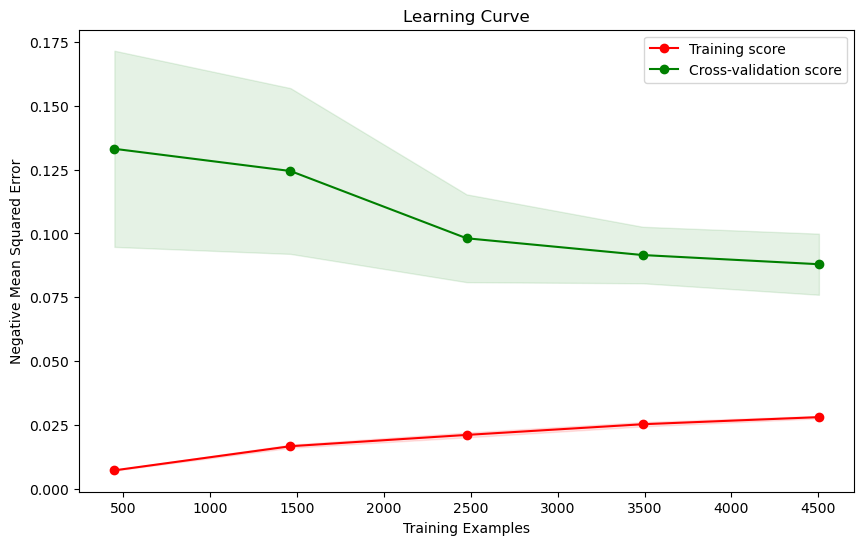

In [6]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_estimator, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Negative Mean Squared Error')
plt.legend(loc="best")
plt.savefig('learning_curve.png', dpi=300)
plt.show()

**Visualize Explanations:**

In [7]:
# Create an explainer object
explainer = shap.Explainer(best_estimator)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

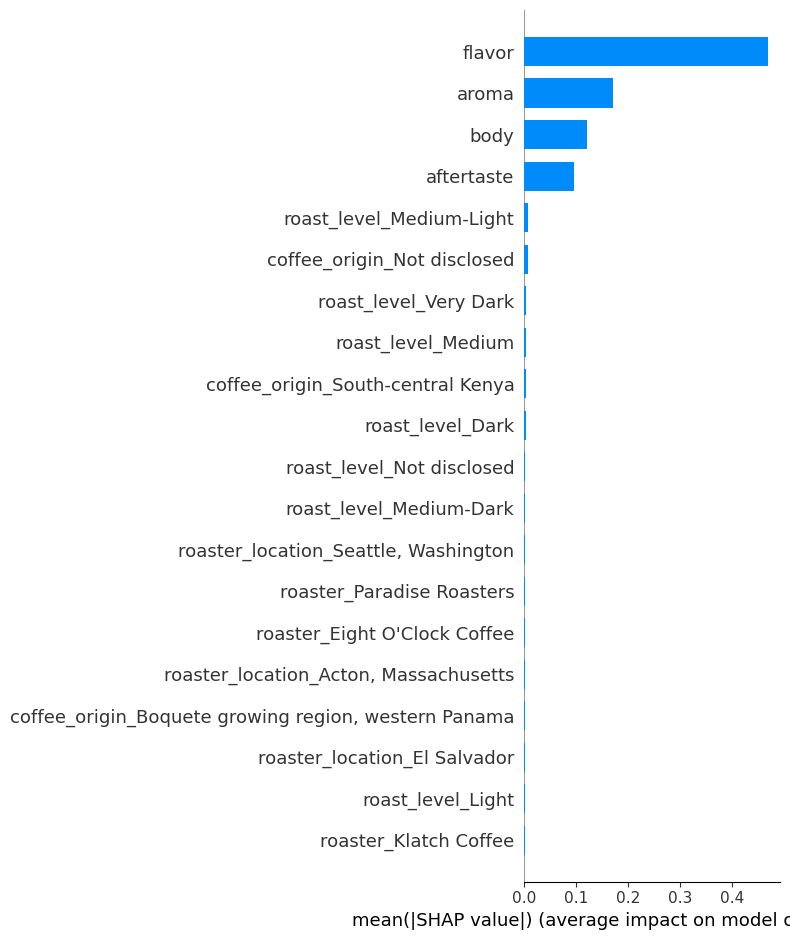

In [8]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [9]:
# Choose an index from the test set for which you want to create a force plot
index_to_explain = 0  # Change this to the desired index

# Create a force plot for the selected data point
shap.force_plot(explainer.expected_value, shap_values[index_to_explain, :], X_test.iloc[index_to_explain, :])

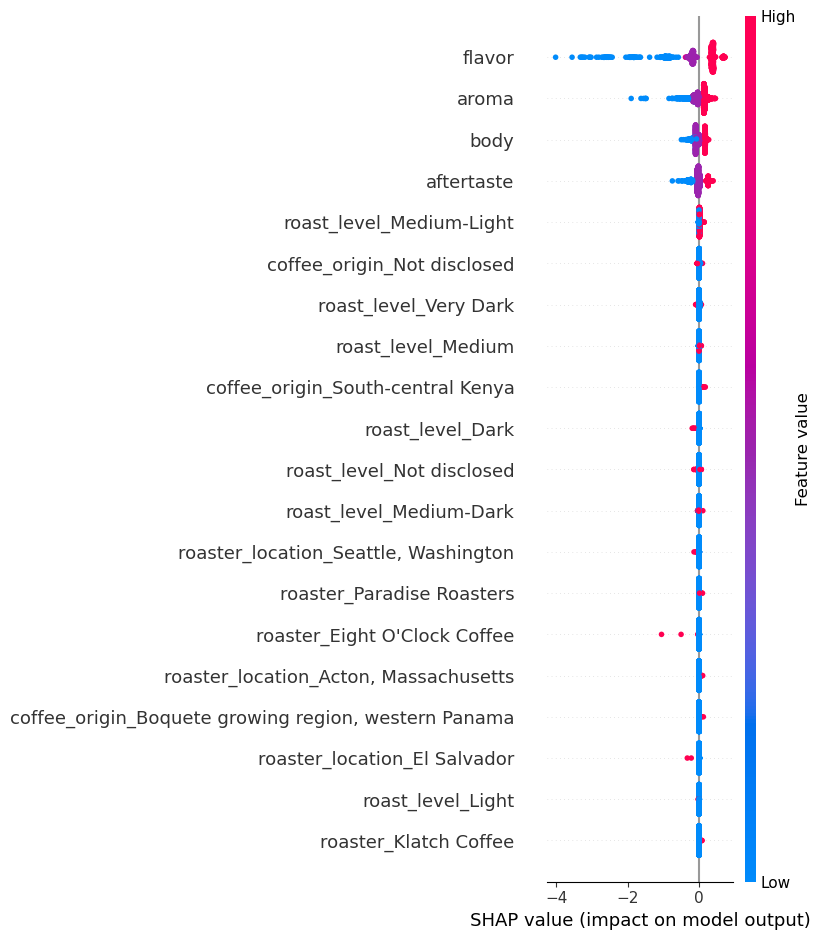

In [10]:
# Summary plot
shap.summary_plot(shap_values, X_test)

# Further Exploration: #

flavor, aroma, body, and aftertaste are the top 4 features that affect rating, and all other features have significantly less affect on rating than these 4 features. I will drop all but these 4 features and the target feature of rating, then run the regression models again to see if better metrics result from a more focused data set.

In [11]:
# Create a dataset of just flavor, aroma, body, aftertaste, and the  target feature of rating.
df_focused = df[['flavor', 'aroma', 'body', 'aftertaste', 'rating']]
df_focused.head()

,flavor,aroma,body,aftertaste,rating
0,0.554627,0.700223,-0.111574,0.040738,0.517301
1,0.554627,0.700223,-0.111574,0.040738,0.274650
2,0.554627,0.700223,1.057494,0.040738,0.759951
3,0.554627,0.700223,1.057494,0.040738,0.759951
4,0.554627,0.700223,-0.111574,0.040738,0.517301


In [12]:
# Split the data into train/test sets
X2 = df_focused.iloc[:, :-1]  # Features (all columns except the last one)
y2 = df_focused.iloc[:, -1]   # Target (last column)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [13]:
# Run xgboost with GridSearchCV on the split focused data set
# Define the parameter grid to search
param_gridGB2 = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the XGBoost regressor
gb2 = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

# Initialize GridSearchCV with scoring='neg_mean_squared_error' to minimize MSE
grid_searchGB2 = GridSearchCV(gb2, param_gridGB2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your data
grid_searchGB2.fit(X_train2, y_train2)

# Get the best parameters and best estimator
best_paramsGB2 = grid_searchGB2.best_params_
best_estimatorGB2 = grid_searchGB2.best_estimator_

# Make predictions using the best estimator
y_predGB_best2 = best_estimatorGB2.predict(X_test2)

In [14]:
# Evaluate the model using all three metrics
maeGB2 = mean_absolute_error(y_test2, y_predGB_best2)
mseGB2 = mean_squared_error(y_test2, y_predGB_best2)
rmseGB2 = np.sqrt(mseGB2)

In [15]:
# Create a dictionary containing your data
table_final = {
    'XGBoost Model': ['Original Dataset', 'Focused Dataset'],
    'MAE': [maeGB_gridsearchcv, maeGB2], 
    'MSE': [mseGB_gridsearchcv, mseGB2], 
    'RMSE': [rmseGB_gridsearchcv, rmseGB2]
}
# Create a DataFrame from the dictionary
table_final = pd.DataFrame(table_final)

# Save the DataFrame
table_final.to_csv('metrics_with_focused_dataset.csv', index=False)

# Display the data table
print(table_final)

      XGBoost Model       MAE       MSE      RMSE
0  Original Dataset  0.184580  0.080327  0.283421
1   Focused Dataset  0.187503  0.083615  0.289163


All scores were slightly higher for the xgboost modeling on the focused data compared to the original data.

In [16]:
# Create an explainer object
explainer2 = shap.Explainer(best_estimatorGB2)

# Calculate SHAP values for the test data
shap_values2 = explainer2.shap_values(X_test2)

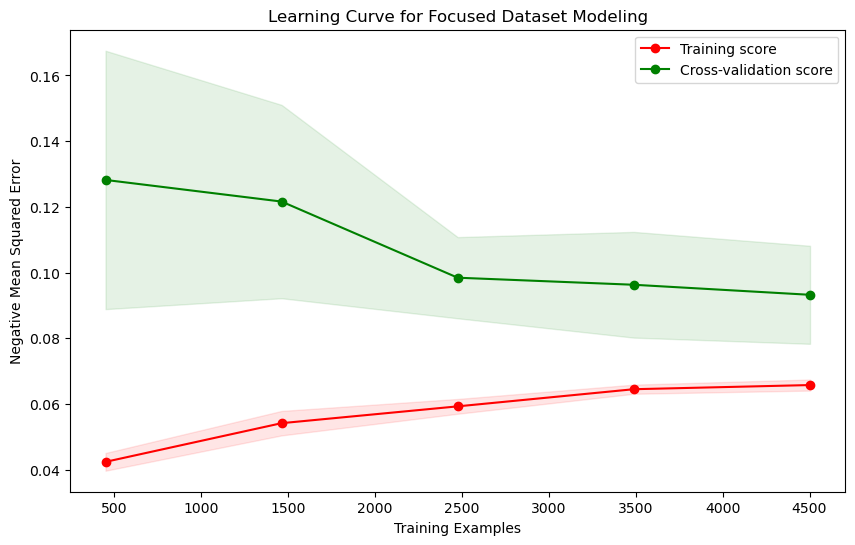

In [17]:
# Asses the mmodel with a learning curve
train_sizes2, train_scores2, test_scores2 = learning_curve(best_estimatorGB2, X_train2, y_train2, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of training and test scores
train_scores_mean2 = -train_scores2.mean(axis=1)
train_scores_std2 = train_scores2.std(axis=1)
test_scores_mean2 = -test_scores2.mean(axis=1)
test_scores_std2 = test_scores2.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes2, train_scores_mean2 - train_scores_std2, train_scores_mean2 + train_scores_std2, alpha=0.1, color="r")
plt.fill_between(train_sizes2, test_scores_mean2 - test_scores_std2, test_scores_mean2 + test_scores_std2, alpha=0.1, color="g")
plt.plot(train_sizes2, train_scores_mean2, 'o-', color="r", label="Training score")
plt.plot(train_sizes2, test_scores_mean2, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve for Focused Dataset Modeling')
plt.xlabel('Training Examples')
plt.ylabel('Negative Mean Squared Error')
plt.legend(loc="best")
plt.savefig('learning_curve_focused_dataset.png', dpi=300)
plt.show()

In [18]:
# Choose an index from the test set for which you want to create a force plot
index_to_explain2 = 0  # Change this to the desired index

# Create a force plot for the selected data point
shap.force_plot(explainer2.expected_value, shap_values2[index_to_explain2, :], X_test2.iloc[index_to_explain2, :])

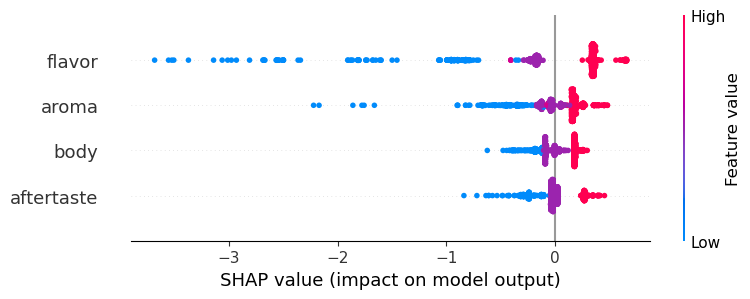

In [19]:
# Summary plot
shap.summary_plot(shap_values2, X_test2)